In [2]:
!kaggle datasets download -d ifigotin/imagenetmini-1000

Dataset URL: https://www.kaggle.com/datasets/ifigotin/imagenetmini-1000
License(s): unknown
100% 3.91G/3.92G [00:49<00:00, 140MB/s]
100% 3.92G/3.92G [00:49<00:00, 84.3MB/s]


In [3]:
!pip install numpy pillow matplotlib tensorflow scikit-learn annoy tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552449 sha256=a800472ad59419e03a06136c3b655f34a4b98985842bec5eac95c6d17aa2856c
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [12]:
!unzip /content/imagenetmini-1000.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_2632.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_2763.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_3015.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_3378.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_3497.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_3745.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_4157.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_461.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_4704.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_4789.JPEG  
  inflating: /content/dataset/imagenet-mini/train/n07875152/n07875152_4848.JPEG  
  inflating: /content/dataset/imagenet-mini/trai

In [6]:
import os
import shutil
import pandas as pd

In [13]:
# Base directory of your dataset
base_dir = '/content/dataset/imagenet-mini'  # Adjust this path

# Paths to train and val directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Path for the new images directory
images_dir = os.path.join(base_dir, 'images')

# Ensure the images directory exists
os.makedirs(images_dir, exist_ok=True)


In [14]:
train_data = []
val_data = []

In [15]:
# Iterate over each category in the train directory
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        # Iterate over each image in the category
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"  # To avoid filename conflicts
            img_dst_path = os.path.join(images_dir, img_dst_name)
            # Move the image to the images directory
            shutil.move(img_src_path, img_dst_path)
            # Record the filename and label
            train_data.append({'filename': img_dst_name, 'label': category})

In [16]:
# Iterate over each category in the val directory
for category in os.listdir(val_dir):
    category_path = os.path.join(val_dir, category)
    if os.path.isdir(category_path):
        # Iterate over each image in the category
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"  # To avoid filename conflicts
            img_dst_path = os.path.join(images_dir, img_dst_name)
            # Move the image to the images directory
            shutil.move(img_src_path, img_dst_path)
            # Record the filename and label
            val_data.append({'filename': img_dst_name, 'label': category})

In [17]:
# Convert lists to DataFrames
train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)

# Save to CSV files
train_csv_path = os.path.join(base_dir, 'train.csv')
val_csv_path = os.path.join(base_dir, 'val.csv')

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)

In [18]:
test_csv_path = os.path.join(base_dir, 'test.csv')  # This will be created

In [19]:
combined_df = pd.concat([train_df, val_df], ignore_index=True)

In [20]:
# Define the proportion for the test set (e.g., 10%)
test_size = 0.1  # 10% of the data

# Shuffle the combined data
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the number of test samples
num_test_samples = int(test_size * len(combined_df))

# Split the data
test_df = combined_df.iloc[:num_test_samples]
remaining_df = combined_df.iloc[num_test_samples:]

In [21]:
# Calculate the proportion of validation data in the remaining data
val_proportion = len(val_df) / (len(train_df) + len(val_df))

# Calculate the number of validation samples
num_val_samples = int(val_proportion * len(remaining_df))

# Split remaining data into new validation and training sets
val_df_new = remaining_df.iloc[:num_val_samples]
train_df_new = remaining_df.iloc[num_val_samples:]

In [22]:
# Save the new train.csv
train_df_new.to_csv(train_csv_path, index=False)

# Save the new val.csv
val_df_new.to_csv(val_csv_path, index=False)

# Save the new test.csv
test_df.to_csv(test_csv_path, index=False)

In [23]:
import os
import pandas as pd

# Define the base directory
base_dir = '/content/dataset/imagenet-mini'

# Path to the images directory
image_dir = os.path.join(base_dir, 'images')

# Load the CSV files
train_csv = pd.read_csv(os.path.join(base_dir, 'train.csv'))
val_csv = pd.read_csv(os.path.join(base_dir, 'val.csv'))
test_csv = pd.read_csv(os.path.join(base_dir, 'test.csv'))

# Combine all data into a single DataFrame
all_data = pd.concat([train_csv, val_csv, test_csv], ignore_index=True)

# Get the list of image file paths
image_files = [os.path.join(image_dir, fname) for fname in all_data['filename']]

In [27]:
import joblib
import numpy as np
from PIL import Image
from tqdm import tqdm

In [25]:
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size, Image.LANCZOS) # Use Image.LANCZOS instead of Image.ANTIALIAS
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

In [26]:
def image_batch_generator(image_files, batch_size, preprocess_function):
    num_images = len(image_files)
    for offset in range(0, num_images, batch_size):
        batch_files = image_files[offset:offset+batch_size]
        batch_images = [preprocess_function(img_path) for img_path in batch_files]
        yield np.array(batch_images)

In [28]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNetV2 model without the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

<ipython-input-28-6cdc49434d4a>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
batch_size = 32  # Adjust based on your laptop's capabilities
feature_vectors = []
num_images = len(image_files)

# Use tqdm for progress tracking
for batch_images in tqdm(image_batch_generator(image_files, batch_size, preprocess_image), total=num_images // batch_size):
    features = base_model.predict(batch_images)
    feature_vectors.extend(features)

# Convert the list to a NumPy array
feature_vectors = np.array(feature_vectors)

# Save the extracted features to disk
np.save('feature_vectors.npy', feature_vectors)

# Save the list of image files (paths) for later use
joblib.dump(image_files, 'image_files.pkl')

  0%|          | 0/1208 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  0%|          | 1/1208 [00:05<1:56:33,  5.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 2/1208 [00:07<1:08:05,  3.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 3/1208 [00:09<51:35,  2.57s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 4/1208 [00:10<46:02,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 5/1208 [00:12<40:48,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  0%|          | 6/1208 [00:14<38:19,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 7/1208 [00:16<40:30,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 8/1208 [00:19<43:49,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 9/1208 [00:20<40:05,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 10/1208 [00:22<37:11,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 11/1208 [00:23<35:32,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 12/1208 [00:25<34:13,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 13/1208 [00:26<33:18,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 14/1208 [00:28<32:19,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 15/1208 [00:30<36:30,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|▏         | 16/1208 [00:34<45:06,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|▏         | 17/1208 [00:35<40:56,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|▏         | 18/1208 [00:37<38:29,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 19/1208 [00:38<36:00,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 20/1208 [00:40<34:44,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 21/1208 [00:41<33:38,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 22/1208 [00:43<35:35,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 23/1208 [00:46<41:03,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 24/1208 [00:48<38:00,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 25/1208 [00:49<35:41,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 26/1208 [00:51<34:18,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 27/1208 [00:52<33:13,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 28/1208 [00:54<32:40,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 29/1208 [00:56<32:15,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 30/1208 [00:58<36:41,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 31/1208 [01:01<40:31,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 32/1208 [01:02<37:17,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 33/1208 [01:04<35:34,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 34/1208 [01:05<34:17,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 35/1208 [01:07<33:10,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 36/1208 [01:09<32:59,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 37/1208 [01:10<32:26,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 38/1208 [01:13<37:46,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 39/1208 [01:15<38:08,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 40/1208 [01:16<36:14,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 41/1208 [01:18<35:32,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  3%|▎         | 42/1208 [01:20<33:58,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▎         | 43/1208 [01:21<33:09,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▎         | 44/1208 [01:23<32:35,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▎         | 45/1208 [01:25<35:07,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 46/1208 [01:28<39:44,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 47/1208 [01:29<37:24,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 48/1208 [01:31<35:37,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 49/1208 [01:33<34:02,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 50/1208 [01:34<33:11,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 51/1208 [01:36<32:25,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 52/1208 [01:37<31:52,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 53/1208 [01:40<36:05,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 54/1208 [01:43<42:55,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 55/1208 [01:44<38:45,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 56/1208 [01:46<36:37,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 57/1208 [01:48<34:40,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 58/1208 [01:49<33:14,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 59/1208 [01:51<32:19,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▍         | 60/1208 [01:52<32:03,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 61/1208 [01:55<37:20,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 62/1208 [01:57<36:00,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 63/1208 [01:58<34:20,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 64/1208 [02:00<33:14,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 65/1208 [02:02<32:39,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 66/1208 [02:03<31:50,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 67/1208 [02:05<31:28,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 68/1208 [02:07<34:13,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 69/1208 [02:09<38:25,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 70/1208 [02:11<35:43,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 71/1208 [02:12<33:50,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 72/1208 [02:14<33:00,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 73/1208 [02:16<32:04,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 74/1208 [02:17<31:06,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 75/1208 [02:19<30:33,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▋         | 76/1208 [02:21<34:46,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▋         | 77/1208 [02:24<37:49,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▋         | 78/1208 [02:25<36:07,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 79/1208 [02:27<34:07,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 80/1208 [02:28<32:11,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 81/1208 [02:30<31:07,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 82/1208 [02:31<30:44,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 83/1208 [02:33<30:34,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 84/1208 [02:36<35:19,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 85/1208 [02:38<36:23,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 86/1208 [02:39<34:28,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 87/1208 [02:41<32:54,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 88/1208 [02:42<31:22,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 89/1208 [02:44<30:35,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 90/1208 [02:45<30:00,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 91/1208 [02:47<29:56,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 92/1208 [02:50<35:24,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 93/1208 [02:51<34:33,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 94/1208 [02:53<32:23,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 95/1208 [02:54<31:32,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 96/1208 [02:56<30:43,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 97/1208 [02:57<29:38,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 98/1208 [02:59<29:24,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 99/1208 [03:01<31:13,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 100/1208 [03:04<36:31,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 101/1208 [03:05<34:42,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 102/1208 [03:07<33:54,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▊         | 103/1208 [03:09<32:30,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▊         | 104/1208 [03:10<31:24,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▊         | 105/1208 [03:12<30:12,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 106/1208 [03:13<29:33,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  9%|▉         | 107/1208 [03:15<32:35,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  9%|▉         | 108/1208 [03:18<36:43,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 109/1208 [03:19<34:29,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 110/1208 [03:21<32:28,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 111/1208 [03:23<31:31,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 112/1208 [03:24<30:24,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 113/1208 [03:26<30:29,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 114/1208 [03:27<30:12,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 10%|▉         | 115/1208 [03:30<35:18,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 10%|▉         | 116/1208 [03:32<36:38,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 117/1208 [03:34<34:52,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 118/1208 [03:35<32:48,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 119/1208 [03:37<31:08,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 120/1208 [03:39<30:33,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 121/1208 [03:40<30:15,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 122/1208 [03:42<30:05,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 10%|█         | 123/1208 [03:44<35:09,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 124/1208 [03:46<34:01,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 125/1208 [03:48<32:14,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 126/1208 [03:49<31:15,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 127/1208 [03:51<30:39,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 128/1208 [03:53<29:57,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 129/1208 [03:54<29:26,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 130/1208 [03:56<32:07,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 131/1208 [03:59<36:46,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 132/1208 [04:01<34:30,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 133/1208 [04:02<32:33,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 134/1208 [04:04<31:50,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 135/1208 [04:05<30:32,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█▏        | 136/1208 [04:07<29:40,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█▏        | 137/1208 [04:09<29:26,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█▏        | 138/1208 [04:11<33:16,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 12%|█▏        | 139/1208 [04:13<36:00,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 140/1208 [04:15<34:01,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 141/1208 [04:17<33:06,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 142/1208 [04:18<31:12,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 143/1208 [04:20<29:58,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 144/1208 [04:21<29:11,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 145/1208 [04:23<28:18,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 12%|█▏        | 146/1208 [04:25<33:22,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 147/1208 [04:27<33:37,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 148/1208 [04:29<32:07,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 149/1208 [04:30<30:31,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 150/1208 [04:32<29:34,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▎        | 151/1208 [04:34<28:57,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 152/1208 [04:35<28:19,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 153/1208 [04:37<28:33,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 154/1208 [04:39<33:00,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 155/1208 [04:41<32:17,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 156/1208 [04:43<31:04,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 157/1208 [04:44<30:42,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 158/1208 [04:46<29:30,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 159/1208 [04:47<29:04,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 160/1208 [04:49<28:39,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 161/1208 [04:51<31:03,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 162/1208 [04:54<35:36,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 163/1208 [04:55<33:15,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▎        | 164/1208 [04:57<31:40,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▎        | 165/1208 [04:58<30:10,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▎        | 166/1208 [05:00<29:20,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 167/1208 [05:02<28:58,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 168/1208 [05:04<29:47,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 14%|█▍        | 169/1208 [05:07<36:42,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 170/1208 [05:08<34:03,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 171/1208 [05:10<31:53,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 172/1208 [05:11<30:26,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 173/1208 [05:13<29:58,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 174/1208 [05:15<28:40,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 175/1208 [05:16<28:19,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▍        | 176/1208 [05:18<31:30,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▍        | 177/1208 [05:21<34:32,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 178/1208 [05:22<32:03,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 179/1208 [05:24<30:21,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 180/1208 [05:25<29:03,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 181/1208 [05:27<28:23,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 182/1208 [05:29<27:56,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 183/1208 [05:30<27:46,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▌        | 184/1208 [05:33<32:14,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▌        | 185/1208 [05:35<33:55,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 186/1208 [05:36<31:52,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 187/1208 [05:38<30:32,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 188/1208 [05:40<29:05,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 189/1208 [05:41<28:37,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 190/1208 [05:43<28:05,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 191/1208 [05:45<29:16,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▌        | 192/1208 [05:47<33:04,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 193/1208 [05:49<31:37,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 194/1208 [05:50<30:02,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 195/1208 [05:52<28:50,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 196/1208 [05:54<28:06,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▋        | 197/1208 [05:55<28:17,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▋        | 198/1208 [05:57<27:38,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▋        | 199/1208 [05:59<30:10,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 17%|█▋        | 200/1208 [06:02<34:09,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 201/1208 [06:03<31:24,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 202/1208 [06:05<29:53,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 203/1208 [06:06<29:03,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 204/1208 [06:08<28:48,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 205/1208 [06:09<27:52,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 206/1208 [06:11<27:23,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 17%|█▋        | 207/1208 [06:13<31:16,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 17%|█▋        | 208/1208 [06:16<34:11,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 209/1208 [06:18<32:28,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 210/1208 [06:19<30:24,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 211/1208 [06:21<29:12,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 212/1208 [06:22<28:13,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 213/1208 [06:25<32:12,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


 18%|█▊        | 214/1208 [06:30<46:05,  2.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 18%|█▊        | 215/1208 [06:34<52:47,  3.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 216/1208 [06:35<44:59,  2.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 217/1208 [06:37<39:49,  2.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 218/1208 [06:39<35:59,  2.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 219/1208 [06:40<34:00,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 220/1208 [06:43<36:24,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 18%|█▊        | 221/1208 [06:46<40:29,  2.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 222/1208 [06:48<35:52,  2.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 223/1208 [06:49<32:49,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▊        | 224/1208 [06:51<30:53,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▊        | 225/1208 [06:52<29:14,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 19%|█▊        | 226/1208 [06:56<38:24,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 19%|█▉        | 227/1208 [07:00<48:29,  2.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 19%|█▉        | 228/1208 [07:03<44:01,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 229/1208 [07:04<38:30,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 230/1208 [07:06<34:31,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 231/1208 [07:07<31:41,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 19%|█▉        | 232/1208 [07:09<32:38,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 19%|█▉        | 233/1208 [07:12<35:13,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 234/1208 [07:14<32:51,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 235/1208 [07:15<30:16,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 236/1208 [07:17<28:54,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|█▉        | 237/1208 [07:19<31:16,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 238/1208 [07:20<29:19,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|█▉        | 239/1208 [07:22<29:33,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|█▉        | 240/1208 [07:25<33:50,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 241/1208 [07:27<31:56,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 242/1208 [07:28<29:49,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 243/1208 [07:30<28:40,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|██        | 244/1208 [07:32<31:44,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 245/1208 [07:34<30:56,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|██        | 246/1208 [07:37<33:24,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 20%|██        | 247/1208 [07:41<42:11,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 248/1208 [07:42<37:17,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 249/1208 [07:44<33:33,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 250/1208 [07:45<31:07,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 251/1208 [07:47<29:35,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 252/1208 [07:49<28:34,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██        | 253/1208 [07:51<29:09,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██        | 254/1208 [07:53<32:06,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 255/1208 [07:55<30:41,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 256/1208 [07:56<29:01,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██▏       | 257/1208 [07:58<28:29,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██▏       | 258/1208 [08:00<28:40,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██▏       | 259/1208 [08:02<30:08,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 260/1208 [08:04<30:24,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 261/1208 [08:07<33:30,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 262/1208 [08:09<33:32,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 263/1208 [08:10<31:02,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 264/1208 [08:12<29:14,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 265/1208 [08:14<29:36,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 266/1208 [08:15<28:21,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 267/1208 [08:17<28:11,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 268/1208 [08:20<31:42,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 269/1208 [08:22<30:12,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 270/1208 [08:23<28:20,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 271/1208 [08:25<27:07,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 272/1208 [08:26<26:27,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 273/1208 [08:28<25:18,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 274/1208 [08:29<25:15,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 275/1208 [08:31<26:02,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 276/1208 [08:34<30:09,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 277/1208 [08:35<29:16,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 278/1208 [08:37<28:21,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 279/1208 [08:39<26:57,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 280/1208 [08:41<28:21,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 281/1208 [08:42<27:07,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 282/1208 [08:44<26:25,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 283/1208 [08:46<30:29,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▎       | 284/1208 [08:49<31:15,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▎       | 285/1208 [08:51<32:14,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 24%|██▎       | 286/1208 [08:54<38:23,  2.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 287/1208 [08:57<37:53,  2.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▍       | 288/1208 [08:59<34:55,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▍       | 289/1208 [09:01<35:42,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 290/1208 [09:03<32:46,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 291/1208 [09:04<30:05,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 292/1208 [09:06<27:52,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 293/1208 [09:07<26:49,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 294/1208 [09:09<26:07,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 295/1208 [09:10<25:13,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▍       | 296/1208 [09:13<27:08,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▍       | 297/1208 [09:15<30:51,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 298/1208 [09:17<29:12,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▍       | 299/1208 [09:20<34:12,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 300/1208 [09:22<34:26,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 301/1208 [09:24<31:14,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 25%|██▌       | 302/1208 [09:27<37:19,  2.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▌       | 303/1208 [09:30<40:31,  2.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 304/1208 [09:32<35:50,  2.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 305/1208 [09:34<32:27,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 306/1208 [09:35<29:54,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 307/1208 [09:37<28:02,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 308/1208 [09:39<27:44,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 309/1208 [09:41<27:37,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▌       | 310/1208 [09:43<31:30,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 311/1208 [09:45<30:00,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 312/1208 [09:47<28:20,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 313/1208 [09:48<26:49,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 314/1208 [09:50<25:52,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 315/1208 [09:51<25:10,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 316/1208 [09:53<25:28,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▌       | 317/1208 [09:56<30:45,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▋       | 318/1208 [09:58<30:28,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▋       | 319/1208 [10:00<28:02,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▋       | 320/1208 [10:01<26:39,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 321/1208 [10:03<25:50,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 322/1208 [10:04<25:02,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 323/1208 [10:06<24:35,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 324/1208 [10:08<25:49,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 325/1208 [10:10<29:08,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 326/1208 [10:12<28:26,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 327/1208 [10:14<26:52,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 328/1208 [10:15<25:38,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 329/1208 [10:17<24:46,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 330/1208 [10:19<24:10,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 331/1208 [10:20<24:30,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 332/1208 [10:23<27:16,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 333/1208 [10:25<29:46,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 334/1208 [10:27<27:41,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 335/1208 [10:28<26:05,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 336/1208 [10:30<25:17,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 337/1208 [10:31<24:39,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 338/1208 [10:33<24:27,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 339/1208 [10:35<23:51,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 340/1208 [10:37<28:30,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 341/1208 [10:40<29:37,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 342/1208 [10:41<27:54,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 343/1208 [10:43<28:53,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 344/1208 [10:45<26:57,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▊       | 345/1208 [10:47<25:40,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▊       | 346/1208 [10:48<24:43,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▊       | 347/1208 [10:50<26:32,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 348/1208 [10:53<29:24,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 349/1208 [10:54<27:35,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 350/1208 [10:56<26:17,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 351/1208 [10:58<25:03,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 352/1208 [10:59<24:44,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 353/1208 [11:01<24:20,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 354/1208 [11:02<23:45,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 355/1208 [11:05<27:09,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 356/1208 [11:07<28:39,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 357/1208 [11:09<27:04,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 358/1208 [11:10<25:39,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 359/1208 [11:12<24:44,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 360/1208 [11:14<24:02,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 361/1208 [11:15<23:49,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|██▉       | 362/1208 [11:18<26:14,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|███       | 363/1208 [11:20<29:26,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 364/1208 [11:22<27:22,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 365/1208 [11:23<25:55,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 366/1208 [11:25<24:37,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 367/1208 [11:27<23:56,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 368/1208 [11:28<23:44,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 369/1208 [11:30<23:16,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███       | 370/1208 [11:32<25:23,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███       | 371/1208 [11:35<28:51,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 372/1208 [11:36<26:47,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 373/1208 [11:38<25:18,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 374/1208 [11:39<24:06,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 375/1208 [11:41<23:24,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 376/1208 [11:42<22:48,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 377/1208 [11:44<22:19,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███▏      | 378/1208 [11:46<25:45,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███▏      | 379/1208 [11:49<30:16,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███▏      | 380/1208 [11:51<27:25,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 381/1208 [11:53<25:46,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 382/1208 [11:54<24:52,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 383/1208 [11:56<23:45,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 384/1208 [11:57<23:10,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 32%|███▏      | 385/1208 [11:59<23:58,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 32%|███▏      | 386/1208 [12:02<28:38,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 387/1208 [12:04<27:16,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 388/1208 [12:05<25:21,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 389/1208 [12:07<24:07,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 390/1208 [12:09<23:15,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 391/1208 [12:10<22:31,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 392/1208 [12:12<22:31,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 393/1208 [12:14<24:43,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 394/1208 [12:17<28:26,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 395/1208 [12:18<26:23,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 396/1208 [12:20<24:53,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 397/1208 [12:21<23:51,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 398/1208 [12:23<22:54,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 399/1208 [12:25<22:11,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 400/1208 [12:26<21:53,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 401/1208 [12:28<24:19,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 402/1208 [12:31<27:07,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 403/1208 [12:32<25:05,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 404/1208 [12:34<24:01,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▎      | 405/1208 [12:35<22:52,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▎      | 406/1208 [12:37<22:18,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▎      | 407/1208 [12:39<22:05,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 408/1208 [12:40<21:44,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 34%|███▍      | 409/1208 [12:42<24:02,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 34%|███▍      | 410/1208 [12:45<27:22,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 411/1208 [12:47<25:34,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 412/1208 [12:48<24:23,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 413/1208 [12:50<23:26,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 414/1208 [12:52<22:36,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 415/1208 [12:53<22:12,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 416/1208 [12:55<21:53,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▍      | 417/1208 [12:57<25:32,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 418/1208 [12:59<25:33,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 419/1208 [13:01<23:47,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 420/1208 [13:03<23:24,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 421/1208 [13:04<22:57,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 422/1208 [13:06<22:08,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 423/1208 [13:07<21:24,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 424/1208 [13:09<21:38,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▌      | 425/1208 [13:12<25:19,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 426/1208 [13:13<24:18,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 427/1208 [13:15<23:19,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 428/1208 [13:16<22:22,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 429/1208 [13:18<21:39,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 430/1208 [13:20<21:17,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 431/1208 [13:21<21:24,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 36%|███▌      | 432/1208 [13:23<22:43,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 36%|███▌      | 433/1208 [13:26<25:51,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 434/1208 [13:27<24:26,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 435/1208 [13:29<23:23,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 436/1208 [13:31<22:16,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 437/1208 [13:32<21:46,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▋      | 438/1208 [13:34<21:00,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▋      | 439/1208 [13:35<20:38,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 36%|███▋      | 440/1208 [13:37<22:39,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 37%|███▋      | 441/1208 [13:40<25:25,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 442/1208 [13:42<23:52,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 443/1208 [13:43<22:40,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 444/1208 [13:45<21:46,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 445/1208 [13:46<21:09,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 446/1208 [13:48<20:46,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 447/1208 [13:49<20:26,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 37%|███▋      | 448/1208 [13:52<23:14,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 37%|███▋      | 449/1208 [13:54<25:19,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 450/1208 [13:56<23:43,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 451/1208 [13:58<23:47,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 452/1208 [13:59<22:28,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 453/1208 [14:01<21:47,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 454/1208 [14:02<21:15,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 455/1208 [14:04<20:42,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 456/1208 [14:07<24:56,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 457/1208 [14:08<23:56,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 458/1208 [14:10<22:22,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 459/1208 [14:12<21:52,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 460/1208 [14:13<20:56,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 461/1208 [14:15<20:25,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 462/1208 [14:16<20:03,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 463/1208 [14:18<20:51,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 464/1208 [14:21<24:27,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 465/1208 [14:22<23:35,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▊      | 466/1208 [14:24<22:00,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▊      | 467/1208 [14:25<21:10,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▊      | 468/1208 [14:27<20:39,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 469/1208 [14:29<20:19,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 470/1208 [14:30<20:33,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 39%|███▉      | 471/1208 [14:32<22:18,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 39%|███▉      | 472/1208 [14:35<25:50,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 473/1208 [14:37<23:47,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 474/1208 [14:38<22:27,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 475/1208 [14:40<21:28,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 476/1208 [14:42<20:47,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 477/1208 [14:43<20:22,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 478/1208 [14:45<20:08,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|███▉      | 479/1208 [14:47<22:49,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|███▉      | 480/1208 [14:50<24:34,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 481/1208 [14:51<22:41,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 482/1208 [14:53<21:34,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 483/1208 [14:54<20:54,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 484/1208 [14:56<20:06,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 485/1208 [14:57<19:37,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 486/1208 [14:59<19:31,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|████      | 487/1208 [15:01<22:53,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|████      | 488/1208 [15:04<23:51,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 489/1208 [15:05<22:17,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 490/1208 [15:07<21:09,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 491/1208 [15:08<20:14,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 492/1208 [15:10<19:42,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 493/1208 [15:11<19:22,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 494/1208 [15:13<19:09,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 41%|████      | 495/1208 [15:16<22:55,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 496/1208 [15:18<23:43,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 497/1208 [15:19<22:05,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 498/1208 [15:21<21:03,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████▏     | 499/1208 [15:23<20:27,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████▏     | 500/1208 [15:24<19:51,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████▏     | 501/1208 [15:26<19:21,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 502/1208 [15:28<20:19,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 503/1208 [15:31<25:35,  2.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 504/1208 [15:32<23:34,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 505/1208 [15:34<22:17,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 506/1208 [15:36<21:02,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 507/1208 [15:37<20:16,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 508/1208 [15:39<19:43,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 509/1208 [15:40<19:15,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 510/1208 [15:43<22:24,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 511/1208 [15:45<22:11,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 512/1208 [15:46<20:51,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 513/1208 [15:48<20:03,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 514/1208 [15:50<19:29,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 515/1208 [15:51<19:02,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 516/1208 [15:53<18:38,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 517/1208 [15:55<19:27,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 518/1208 [15:57<22:33,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 519/1208 [15:59<21:33,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 520/1208 [16:00<20:35,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 521/1208 [16:02<19:57,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 522/1208 [16:04<19:59,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 523/1208 [16:05<19:26,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 524/1208 [16:07<18:44,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 525/1208 [16:09<21:20,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 44%|████▎     | 526/1208 [16:12<23:12,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▎     | 527/1208 [16:13<21:27,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▎     | 528/1208 [16:15<20:21,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 529/1208 [16:16<19:30,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 530/1208 [16:18<19:00,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 531/1208 [16:20<18:38,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 532/1208 [16:21<18:15,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 44%|████▍     | 533/1208 [16:24<21:26,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 534/1208 [16:26<21:16,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 535/1208 [16:27<20:24,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 536/1208 [16:29<19:34,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 537/1208 [16:30<18:51,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 538/1208 [16:32<18:28,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 539/1208 [16:33<18:02,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▍     | 540/1208 [16:35<18:56,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▍     | 541/1208 [16:38<23:01,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 542/1208 [16:40<21:47,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 543/1208 [16:42<20:23,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 544/1208 [16:43<19:36,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 545/1208 [16:45<19:02,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 546/1208 [16:46<18:41,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 547/1208 [16:48<18:07,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▌     | 548/1208 [16:50<20:47,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▌     | 549/1208 [16:53<22:31,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 550/1208 [16:54<20:53,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 551/1208 [16:56<19:59,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 552/1208 [16:58<19:24,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 553/1208 [16:59<18:31,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 554/1208 [17:01<18:18,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 555/1208 [17:02<17:43,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 46%|████▌     | 556/1208 [17:05<20:55,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 46%|████▌     | 557/1208 [17:07<21:34,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 558/1208 [17:09<20:22,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▋     | 559/1208 [17:10<19:35,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▋     | 560/1208 [17:12<18:46,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▋     | 561/1208 [17:14<18:24,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 562/1208 [17:15<17:56,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 563/1208 [17:17<18:10,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 564/1208 [17:20<21:15,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 565/1208 [17:21<20:30,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 566/1208 [17:23<19:22,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 567/1208 [17:24<18:30,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 568/1208 [17:26<18:07,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 569/1208 [17:28<17:45,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 570/1208 [17:29<17:30,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 571/1208 [17:32<21:26,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 572/1208 [17:34<21:14,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 573/1208 [17:36<20:01,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 574/1208 [17:37<19:06,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 575/1208 [17:39<18:21,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 576/1208 [17:40<17:46,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 577/1208 [17:42<17:12,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 578/1208 [17:44<18:21,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 579/1208 [17:47<22:16,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 580/1208 [17:49<20:37,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 581/1208 [17:50<19:30,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 582/1208 [17:52<18:45,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 583/1208 [17:53<18:11,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 584/1208 [17:55<17:55,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 585/1208 [17:57<17:38,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▊     | 586/1208 [18:00<20:56,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▊     | 587/1208 [18:01<20:07,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▊     | 588/1208 [18:03<18:59,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 589/1208 [18:05<18:14,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 590/1208 [18:06<17:28,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 591/1208 [18:08<17:17,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 592/1208 [18:09<16:57,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▉     | 593/1208 [18:11<18:13,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▉     | 594/1208 [18:14<20:39,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 595/1208 [18:16<19:46,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 596/1208 [18:17<19:03,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 597/1208 [18:19<18:16,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 598/1208 [18:21<17:43,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 599/1208 [18:22<17:09,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 600/1208 [18:24<16:39,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 50%|████▉     | 601/1208 [18:26<18:36,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 50%|████▉     | 602/1208 [18:29<21:30,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 603/1208 [18:31<20:01,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 604/1208 [18:32<18:53,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 605/1208 [18:34<18:06,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 606/1208 [18:35<17:26,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 607/1208 [18:37<17:13,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 608/1208 [18:39<16:47,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 50%|█████     | 609/1208 [18:41<19:46,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 610/1208 [18:43<19:28,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 611/1208 [18:45<19:12,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 612/1208 [18:47<18:13,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 613/1208 [18:48<17:33,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 614/1208 [18:50<16:56,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 615/1208 [18:51<16:28,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████     | 616/1208 [18:54<18:28,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████     | 617/1208 [18:56<20:17,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 618/1208 [18:58<18:56,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 619/1208 [19:00<18:12,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████▏    | 620/1208 [19:01<17:32,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████▏    | 621/1208 [19:03<17:14,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████▏    | 622/1208 [19:05<17:15,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 623/1208 [19:06<16:56,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 624/1208 [19:09<19:33,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 625/1208 [19:11<19:01,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 626/1208 [19:12<18:01,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 627/1208 [19:14<17:21,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 628/1208 [19:16<16:46,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 629/1208 [19:17<16:13,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 630/1208 [19:19<15:59,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 631/1208 [19:21<17:36,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 632/1208 [19:24<19:40,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 633/1208 [19:25<18:20,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 634/1208 [19:27<17:19,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 635/1208 [19:28<16:44,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 636/1208 [19:30<16:04,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 637/1208 [19:32<15:52,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 638/1208 [19:33<15:52,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 53%|█████▎    | 639/1208 [19:36<17:53,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 53%|█████▎    | 640/1208 [19:38<19:19,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 641/1208 [19:40<17:52,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 642/1208 [19:41<17:14,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 643/1208 [19:43<16:30,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 644/1208 [19:44<16:04,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 645/1208 [19:46<15:43,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 646/1208 [19:48<15:47,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▎    | 647/1208 [19:50<18:26,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▎    | 648/1208 [19:52<18:13,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▎    | 649/1208 [19:54<17:13,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 650/1208 [19:56<16:33,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 651/1208 [19:57<16:04,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 652/1208 [19:59<15:55,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 653/1208 [20:00<15:35,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▍    | 654/1208 [20:03<17:00,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▍    | 655/1208 [20:05<18:58,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 656/1208 [20:07<17:38,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 657/1208 [20:08<16:46,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 658/1208 [20:10<16:11,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 659/1208 [20:12<15:28,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 660/1208 [20:13<15:11,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 661/1208 [20:15<14:56,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 55%|█████▍    | 662/1208 [20:17<16:31,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 55%|█████▍    | 663/1208 [20:20<18:26,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 664/1208 [20:21<17:15,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 665/1208 [20:23<16:25,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 666/1208 [20:24<16:04,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 667/1208 [20:26<15:33,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 668/1208 [20:28<15:32,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 669/1208 [20:29<15:12,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 55%|█████▌    | 670/1208 [20:32<17:59,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 671/1208 [20:34<17:36,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 672/1208 [20:36<16:29,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 673/1208 [20:37<16:01,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 674/1208 [20:39<15:46,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 675/1208 [20:41<15:20,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 676/1208 [20:42<14:59,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 56%|█████▌    | 677/1208 [20:44<16:05,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 56%|█████▌    | 678/1208 [20:47<17:56,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 679/1208 [20:49<16:56,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▋    | 680/1208 [20:50<16:07,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▋    | 681/1208 [20:52<15:30,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▋    | 682/1208 [20:53<15:03,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 683/1208 [20:55<14:38,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 684/1208 [20:57<14:24,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 685/1208 [20:59<17:22,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 686/1208 [21:03<20:42,  2.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 687/1208 [21:04<18:42,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 688/1208 [21:06<17:42,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 689/1208 [21:09<20:57,  2.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


 57%|█████▋    | 690/1208 [21:14<25:52,  3.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 691/1208 [21:16<24:57,  2.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 692/1208 [21:18<21:29,  2.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 693/1208 [21:19<19:06,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 694/1208 [21:21<17:37,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 695/1208 [21:23<16:23,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 696/1208 [21:24<15:22,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 697/1208 [21:26<15:02,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 58%|█████▊    | 698/1208 [21:29<18:04,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 699/1208 [21:31<17:09,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 700/1208 [21:32<16:04,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 701/1208 [21:34<15:14,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 702/1208 [21:36<15:16,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 703/1208 [21:37<14:47,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 704/1208 [21:39<14:10,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 58%|█████▊    | 705/1208 [21:41<15:38,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 58%|█████▊    | 706/1208 [21:44<18:50,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▊    | 707/1208 [21:47<19:00,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▊    | 708/1208 [21:48<17:04,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▊    | 709/1208 [21:50<16:12,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 710/1208 [21:51<15:13,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 711/1208 [21:53<14:32,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 59%|█████▉    | 712/1208 [21:55<15:48,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 59%|█████▉    | 713/1208 [21:58<17:17,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 714/1208 [21:59<16:01,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 715/1208 [22:01<15:08,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 716/1208 [22:03<14:21,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 717/1208 [22:04<13:57,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 718/1208 [22:06<13:43,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 719/1208 [22:07<13:26,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 720/1208 [22:10<15:24,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 721/1208 [22:12<16:34,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 722/1208 [22:14<15:28,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 723/1208 [22:15<14:39,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 724/1208 [22:17<14:09,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 725/1208 [22:19<13:51,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 726/1208 [22:20<13:33,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 727/1208 [22:22<13:41,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|██████    | 728/1208 [22:25<15:56,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 729/1208 [22:26<15:15,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 730/1208 [22:28<14:30,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 731/1208 [22:30<13:48,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 732/1208 [22:31<13:23,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 733/1208 [22:33<13:10,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 734/1208 [22:34<13:00,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 61%|██████    | 735/1208 [22:37<14:17,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 61%|██████    | 736/1208 [22:39<16:10,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 737/1208 [22:41<15:14,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 738/1208 [22:42<14:33,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 739/1208 [22:44<13:52,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████▏   | 740/1208 [22:46<13:18,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████▏   | 741/1208 [22:47<13:03,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████▏   | 742/1208 [22:49<12:50,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 743/1208 [22:51<14:39,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 744/1208 [22:54<17:20,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 745/1208 [22:56<15:51,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 746/1208 [22:58<14:46,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 747/1208 [22:59<14:33,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 748/1208 [23:01<13:55,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 749/1208 [23:03<13:26,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 750/1208 [23:05<14:19,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 751/1208 [23:08<16:12,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 752/1208 [23:09<15:18,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 753/1208 [23:11<14:17,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 754/1208 [23:12<13:33,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▎   | 755/1208 [23:14<13:09,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 756/1208 [23:16<12:36,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 757/1208 [23:17<12:30,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 63%|██████▎   | 758/1208 [23:20<13:58,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 63%|██████▎   | 759/1208 [23:22<15:21,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 760/1208 [23:24<14:12,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 761/1208 [23:25<13:29,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 762/1208 [23:27<13:00,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 63%|██████▎   | 763/1208 [23:29<13:57,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 63%|██████▎   | 764/1208 [23:33<19:01,  2.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 63%|██████▎   | 765/1208 [23:37<22:15,  3.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 766/1208 [23:39<19:06,  2.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 767/1208 [23:40<16:51,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▎   | 768/1208 [23:42<15:07,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▎   | 769/1208 [23:44<14:04,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▎   | 770/1208 [23:45<13:18,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 771/1208 [23:47<13:00,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 64%|██████▍   | 772/1208 [23:50<15:49,  2.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 64%|██████▍   | 773/1208 [23:53<18:14,  2.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 774/1208 [23:55<16:00,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 775/1208 [23:56<14:28,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 776/1208 [23:58<13:38,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 777/1208 [24:00<13:01,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 64%|██████▍   | 778/1208 [24:02<14:56,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 779/1208 [24:04<14:44,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 780/1208 [24:06<13:38,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 781/1208 [24:07<12:56,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 782/1208 [24:09<12:19,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 783/1208 [24:10<11:45,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 784/1208 [24:12<11:30,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 785/1208 [24:14<11:30,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 65%|██████▌   | 786/1208 [24:16<13:23,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 65%|██████▌   | 787/1208 [24:18<13:40,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 788/1208 [24:20<12:56,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 789/1208 [24:21<12:11,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 790/1208 [24:23<11:41,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 791/1208 [24:24<11:22,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 792/1208 [24:26<11:10,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 793/1208 [24:28<11:06,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 66%|██████▌   | 794/1208 [24:30<13:00,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 795/1208 [24:32<12:49,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 796/1208 [24:33<12:15,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 797/1208 [24:35<11:53,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 798/1208 [24:37<11:34,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 799/1208 [24:38<11:23,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 800/1208 [24:40<11:08,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 66%|██████▋   | 801/1208 [24:42<12:26,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 66%|██████▋   | 802/1208 [24:47<19:10,  2.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▋   | 803/1208 [24:49<16:53,  2.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 804/1208 [24:51<14:59,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 805/1208 [24:52<13:45,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 806/1208 [24:54<12:44,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 807/1208 [24:56<12:30,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 67%|██████▋   | 808/1208 [24:58<14:09,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 809/1208 [25:00<13:23,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 810/1208 [25:02<12:35,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 811/1208 [25:03<11:43,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 812/1208 [25:05<11:17,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 813/1208 [25:06<10:51,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 814/1208 [25:08<10:43,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 67%|██████▋   | 815/1208 [25:10<11:34,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 816/1208 [25:12<12:59,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 817/1208 [25:14<12:06,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 818/1208 [25:16<11:32,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 819/1208 [25:17<11:07,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 820/1208 [25:19<11:03,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 821/1208 [25:20<10:44,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 822/1208 [25:22<10:30,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 823/1208 [25:24<12:04,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 824/1208 [25:27<13:18,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 825/1208 [25:29<12:16,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 826/1208 [25:30<11:33,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 827/1208 [25:32<11:19,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▊   | 828/1208 [25:33<10:56,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▊   | 829/1208 [25:35<10:38,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▊   | 830/1208 [25:37<10:27,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▉   | 831/1208 [25:39<12:21,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▉   | 832/1208 [25:41<12:30,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 833/1208 [25:43<11:40,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 834/1208 [25:45<11:51,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 835/1208 [25:47<11:17,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 836/1208 [25:48<11:04,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 837/1208 [25:50<10:40,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▉   | 838/1208 [25:52<11:27,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▉   | 839/1208 [25:55<12:45,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 840/1208 [25:56<11:55,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 841/1208 [25:58<11:16,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 842/1208 [26:00<10:54,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 843/1208 [26:01<10:31,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 844/1208 [26:03<10:12,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 845/1208 [26:04<10:03,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|███████   | 846/1208 [26:07<11:12,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|███████   | 847/1208 [26:09<12:14,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|███████   | 848/1208 [26:11<12:21,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 70%|███████   | 849/1208 [26:15<14:51,  2.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 70%|███████   | 850/1208 [26:18<17:16,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


 70%|███████   | 851/1208 [26:25<23:05,  3.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 71%|███████   | 852/1208 [26:27<20:27,  3.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 853/1208 [26:29<17:01,  2.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 854/1208 [26:30<14:34,  2.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 855/1208 [26:32<13:01,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 856/1208 [26:33<12:00,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 71%|███████   | 857/1208 [26:36<12:35,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 71%|███████   | 858/1208 [26:38<12:49,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 859/1208 [26:40<11:46,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 860/1208 [26:41<10:54,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 861/1208 [26:43<10:36,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 862/1208 [26:45<10:12,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 863/1208 [26:46<09:52,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 864/1208 [26:48<09:59,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 865/1208 [26:51<11:36,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 866/1208 [26:52<10:57,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 867/1208 [26:54<10:21,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 868/1208 [26:56<10:00,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 869/1208 [26:57<09:37,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 870/1208 [26:59<09:25,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 871/1208 [27:00<09:10,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 872/1208 [27:03<10:30,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 873/1208 [27:05<11:25,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 874/1208 [27:07<10:33,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 875/1208 [27:08<09:59,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 876/1208 [27:10<09:47,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 877/1208 [27:12<09:26,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 878/1208 [27:13<09:07,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 879/1208 [27:15<08:59,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 73%|███████▎  | 880/1208 [27:17<10:29,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 881/1208 [27:19<10:31,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 882/1208 [27:21<09:55,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 883/1208 [27:23<09:34,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 884/1208 [27:24<09:33,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 885/1208 [27:26<09:12,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 886/1208 [27:27<08:53,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 73%|███████▎  | 887/1208 [27:29<09:09,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▎  | 888/1208 [27:32<10:38,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▎  | 889/1208 [27:34<10:14,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▎  | 890/1208 [27:35<09:38,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 891/1208 [27:37<09:12,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 892/1208 [27:38<08:52,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 893/1208 [27:40<08:34,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 894/1208 [27:41<08:25,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▍  | 895/1208 [27:43<09:08,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▍  | 896/1208 [27:46<10:30,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 897/1208 [27:48<09:49,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 898/1208 [27:49<09:14,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 899/1208 [27:51<08:47,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 900/1208 [27:52<08:33,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 901/1208 [27:54<08:21,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 902/1208 [27:56<08:16,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▍  | 903/1208 [27:58<09:08,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▍  | 904/1208 [28:00<10:13,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 905/1208 [28:02<09:34,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 906/1208 [28:03<08:59,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 907/1208 [28:05<08:42,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 908/1208 [28:07<08:30,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 909/1208 [28:08<08:24,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 910/1208 [28:10<08:08,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▌  | 911/1208 [28:12<09:13,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▌  | 912/1208 [28:15<09:53,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 913/1208 [28:16<09:17,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 914/1208 [28:18<08:42,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 915/1208 [28:19<08:24,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 916/1208 [28:21<08:11,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 917/1208 [28:22<08:02,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 918/1208 [28:24<07:46,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 76%|███████▌  | 919/1208 [28:27<09:12,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 920/1208 [28:29<09:14,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 921/1208 [28:30<09:08,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▋  | 922/1208 [28:32<08:39,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▋  | 923/1208 [28:34<08:16,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▋  | 924/1208 [28:35<08:15,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 925/1208 [28:37<08:00,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 926/1208 [28:39<08:56,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 927/1208 [28:42<09:47,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 928/1208 [28:43<09:08,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 929/1208 [28:45<08:35,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 930/1208 [28:47<08:18,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 931/1208 [28:48<07:55,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 932/1208 [28:50<07:44,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 933/1208 [28:52<07:53,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 934/1208 [28:54<09:11,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 935/1208 [28:56<08:53,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 936/1208 [28:58<08:20,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 937/1208 [28:59<07:58,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 938/1208 [29:01<07:45,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 939/1208 [29:03<07:32,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 940/1208 [29:04<07:22,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 941/1208 [29:06<08:13,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 942/1208 [29:09<09:06,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 943/1208 [29:11<08:31,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 944/1208 [29:12<08:02,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 945/1208 [29:14<07:43,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 946/1208 [29:15<07:24,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 947/1208 [29:17<07:16,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 948/1208 [29:19<07:07,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▊  | 949/1208 [29:21<08:11,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▊  | 950/1208 [29:23<08:40,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▊  | 951/1208 [29:25<08:06,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 952/1208 [29:27<07:40,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 953/1208 [29:28<07:24,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 954/1208 [29:30<07:09,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 955/1208 [29:31<07:03,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 956/1208 [29:33<06:54,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▉  | 957/1208 [29:36<08:08,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 958/1208 [29:38<08:07,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 959/1208 [29:39<07:40,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 960/1208 [29:41<07:18,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 961/1208 [29:42<07:05,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 962/1208 [29:44<06:59,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 963/1208 [29:46<06:47,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 80%|███████▉  | 964/1208 [29:48<07:14,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 80%|███████▉  | 965/1208 [29:50<08:21,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 966/1208 [29:52<07:47,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 967/1208 [29:54<07:23,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 968/1208 [29:55<07:03,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 969/1208 [29:57<06:47,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 970/1208 [29:58<06:35,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 971/1208 [30:00<06:24,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 80%|████████  | 972/1208 [30:02<07:00,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████  | 973/1208 [30:05<07:52,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 974/1208 [30:06<07:19,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 975/1208 [30:08<07:04,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 976/1208 [30:09<06:48,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 977/1208 [30:11<06:34,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 978/1208 [30:13<06:26,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 979/1208 [30:14<06:19,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████  | 980/1208 [30:17<07:04,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████  | 981/1208 [30:19<07:43,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████▏ | 982/1208 [30:21<07:07,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████▏ | 983/1208 [30:22<06:46,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████▏ | 984/1208 [30:24<06:34,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 985/1208 [30:25<06:14,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 986/1208 [30:27<06:13,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 987/1208 [30:29<06:05,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 988/1208 [30:31<07:08,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 989/1208 [30:33<07:17,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 990/1208 [30:35<06:54,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 991/1208 [30:37<06:27,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 992/1208 [30:38<06:15,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 993/1208 [30:40<06:04,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 994/1208 [30:41<05:57,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 995/1208 [30:43<06:13,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 996/1208 [30:46<07:09,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 997/1208 [30:48<06:49,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 998/1208 [30:49<06:30,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 999/1208 [30:51<06:10,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1000/1208 [30:53<05:56,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1001/1208 [30:54<05:49,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1002/1208 [30:56<05:43,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 1003/1208 [30:58<06:22,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 1004/1208 [31:01<07:01,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1005/1208 [31:02<06:32,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1006/1208 [31:04<06:17,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1007/1208 [31:06<05:58,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1008/1208 [31:07<05:45,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▎ | 1009/1208 [31:09<05:37,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▎ | 1010/1208 [31:10<05:35,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▎ | 1011/1208 [31:13<06:33,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1012/1208 [31:15<06:21,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1013/1208 [31:17<05:57,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1014/1208 [31:18<05:45,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1015/1208 [31:20<05:38,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1016/1208 [31:22<05:29,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1017/1208 [31:23<05:20,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▍ | 1018/1208 [31:26<05:57,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▍ | 1019/1208 [31:28<06:25,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1020/1208 [31:29<05:53,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1021/1208 [31:31<05:35,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1022/1208 [31:33<05:20,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1023/1208 [31:34<05:09,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1024/1208 [31:36<05:02,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1025/1208 [31:37<05:02,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 85%|████████▍ | 1026/1208 [31:40<05:50,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 85%|████████▌ | 1027/1208 [31:42<05:58,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1028/1208 [31:44<05:35,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1029/1208 [31:45<05:18,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1030/1208 [31:47<05:06,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1031/1208 [31:48<04:58,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1032/1208 [31:50<04:50,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1033/1208 [31:52<04:53,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▌ | 1034/1208 [31:54<05:42,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1035/1208 [31:56<05:31,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1036/1208 [31:58<05:09,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1037/1208 [31:59<04:56,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1038/1208 [32:01<04:48,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1039/1208 [32:03<04:43,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1040/1208 [32:04<04:38,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▌ | 1041/1208 [32:06<04:55,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▋ | 1042/1208 [32:09<05:31,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▋ | 1043/1208 [32:10<05:12,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▋ | 1044/1208 [32:12<04:57,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1045/1208 [32:14<04:43,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1046/1208 [32:15<04:33,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1047/1208 [32:17<04:22,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1048/1208 [32:18<04:18,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 87%|████████▋ | 1049/1208 [32:20<04:42,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 87%|████████▋ | 1050/1208 [32:23<05:24,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1051/1208 [32:25<05:01,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1052/1208 [32:26<04:46,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1053/1208 [32:28<04:29,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1054/1208 [32:29<04:22,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1055/1208 [32:31<04:14,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1056/1208 [32:33<04:11,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 1057/1208 [32:35<04:47,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 1058/1208 [32:37<05:00,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1059/1208 [32:39<04:40,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1060/1208 [32:41<04:25,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1061/1208 [32:42<04:13,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1062/1208 [32:44<04:05,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1063/1208 [32:45<03:59,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1064/1208 [32:47<04:01,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 1065/1208 [32:50<04:38,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1066/1208 [32:51<04:27,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1067/1208 [32:53<04:10,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1068/1208 [32:54<04:01,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1069/1208 [32:56<03:53,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▊ | 1070/1208 [32:58<03:58,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▊ | 1071/1208 [32:59<03:49,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▊ | 1072/1208 [33:02<04:06,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▉ | 1073/1208 [33:04<04:35,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1074/1208 [33:06<04:12,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1075/1208 [33:07<03:59,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1076/1208 [33:09<03:48,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1077/1208 [33:10<03:41,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1078/1208 [33:12<03:38,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1079/1208 [33:14<03:29,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▉ | 1080/1208 [33:16<03:59,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▉ | 1081/1208 [33:18<04:15,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1082/1208 [33:20<03:56,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1083/1208 [33:22<03:46,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1084/1208 [33:23<03:35,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1085/1208 [33:25<03:30,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1086/1208 [33:26<03:23,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1087/1208 [33:28<03:22,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 90%|█████████ | 1088/1208 [33:31<03:56,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1089/1208 [33:33<03:51,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1090/1208 [33:34<03:35,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1091/1208 [33:36<03:24,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1092/1208 [33:37<03:18,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1093/1208 [33:39<03:13,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1094/1208 [33:40<03:07,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 1095/1208 [33:42<03:16,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 1096/1208 [33:45<03:42,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1097/1208 [33:47<03:31,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1098/1208 [33:48<03:17,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1099/1208 [33:50<03:13,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1100/1208 [33:52<03:07,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1101/1208 [33:53<03:00,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1102/1208 [33:55<02:57,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████▏| 1103/1208 [33:57<03:18,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████▏| 1104/1208 [34:00<03:35,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████▏| 1105/1208 [34:01<03:19,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1106/1208 [34:03<03:05,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1107/1208 [34:05<02:59,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1108/1208 [34:06<02:50,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1109/1208 [34:08<02:46,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1110/1208 [34:09<02:41,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 1111/1208 [34:12<03:08,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1112/1208 [34:14<03:05,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1113/1208 [34:16<02:55,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1114/1208 [34:17<02:45,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1115/1208 [34:19<02:38,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1116/1208 [34:20<02:37,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1117/1208 [34:22<02:34,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 93%|█████████▎| 1118/1208 [34:24<02:44,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 93%|█████████▎| 1119/1208 [34:27<03:07,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1120/1208 [34:29<02:52,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1121/1208 [34:30<02:38,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1122/1208 [34:32<02:31,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1123/1208 [34:33<02:25,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1124/1208 [34:35<02:20,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1125/1208 [34:37<02:17,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 93%|█████████▎| 1126/1208 [34:39<02:33,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 93%|█████████▎| 1127/1208 [34:41<02:47,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1128/1208 [34:43<02:34,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1129/1208 [34:45<02:24,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▎| 1130/1208 [34:46<02:16,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▎| 1131/1208 [34:48<02:14,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▎| 1132/1208 [34:50<02:09,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1133/1208 [34:51<02:09,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▍| 1134/1208 [34:54<02:26,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1135/1208 [34:56<02:38,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1136/1208 [34:58<02:24,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1137/1208 [35:00<02:15,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1138/1208 [35:01<02:06,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1139/1208 [35:03<01:59,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1140/1208 [35:05<01:57,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▍| 1141/1208 [35:07<02:13,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 95%|█████████▍| 1142/1208 [35:10<02:19,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1143/1208 [35:11<02:07,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1144/1208 [35:13<01:58,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1145/1208 [35:14<01:51,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1146/1208 [35:16<01:46,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1147/1208 [35:18<01:42,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1148/1208 [35:19<01:42,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 95%|█████████▌| 1149/1208 [35:22<01:59,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1150/1208 [35:24<01:52,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1151/1208 [35:25<01:43,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1152/1208 [35:27<01:38,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1153/1208 [35:29<01:37,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1154/1208 [35:30<01:33,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1155/1208 [35:32<01:30,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▌| 1156/1208 [35:34<01:38,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▌| 1157/1208 [35:37<01:44,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1158/1208 [35:39<01:37,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1159/1208 [35:40<01:30,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1160/1208 [35:42<01:24,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1161/1208 [35:43<01:21,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1162/1208 [35:45<01:18,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▋| 1163/1208 [35:47<01:15,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▋| 1164/1208 [35:49<01:26,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▋| 1165/1208 [35:51<01:25,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1166/1208 [35:53<01:19,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1167/1208 [35:55<01:16,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1168/1208 [35:56<01:12,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1169/1208 [35:58<01:07,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1170/1208 [36:00<01:06,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 1171/1208 [36:02<01:10,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 1172/1208 [36:05<01:15,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1173/1208 [36:06<01:08,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1174/1208 [36:08<01:02,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1175/1208 [36:09<00:58,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1176/1208 [36:11<00:55,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1177/1208 [36:13<00:52,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1178/1208 [36:14<00:51,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1179/1208 [36:17<00:58,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1180/1208 [36:19<00:55,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1181/1208 [36:21<00:52,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1182/1208 [36:22<00:47,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1183/1208 [36:24<00:43,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1184/1208 [36:26<00:40,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1185/1208 [36:27<00:38,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1186/1208 [36:29<00:40,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1187/1208 [36:32<00:43,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1188/1208 [36:34<00:38,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1189/1208 [36:35<00:34,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▊| 1190/1208 [36:37<00:31,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▊| 1191/1208 [36:39<00:29,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▊| 1192/1208 [36:40<00:27,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1193/1208 [36:42<00:25,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 99%|█████████▉| 1194/1208 [36:44<00:27,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 99%|█████████▉| 1195/1208 [36:47<00:27,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1196/1208 [36:48<00:23,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1197/1208 [36:50<00:20,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1198/1208 [36:52<00:17,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1199/1208 [36:53<00:15,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1200/1208 [36:55<00:13,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1201/1208 [36:56<00:11,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


100%|█████████▉| 1202/1208 [36:59<00:11,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1203/1208 [37:01<00:09,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1204/1208 [37:03<00:07,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1205/1208 [37:04<00:05,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1206/1208 [37:06<00:03,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1207/1208 [37:08<00:01,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|██████████| 1208/1208 [37:09<00:00,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1209it [37:12,  1.85s/it]


['image_files.pkl']

In [30]:
from sklearn.decomposition import PCA

# Reduce to 256 dimensions
pca = PCA(n_components=256, random_state=42)
reduced_features = pca.fit_transform(feature_vectors)

In [31]:
# Save the PCA model
joblib.dump(pca, 'pca_model.pkl')
np.save('reduced_features.npy', reduced_features)

In [34]:
from annoy import AnnoyIndex

feature_dim = reduced_features.shape[1]

# Create an Annoy index
annoy_index = AnnoyIndex(feature_dim, 'euclidean')

for idx, vector in enumerate(reduced_features):
    annoy_index.add_item(idx, vector)

# Build the index
annoy_index.build(n_trees=10)  # Adjust n_trees as needed
annoy_index.save('annoy_index.ann')

True

In [32]:
# User input image path
user_image_path = '/content/house3.jpg'  # Replace with actual path

# Preprocess the user image
user_image = preprocess_image(user_image_path)
user_image = np.expand_dims(user_image, axis=0)

In [33]:
# Extract feature vector
user_feature = base_model.predict(user_image)[0]

# Apply PCA transformation
user_feature_reduced = pca.transform([user_feature])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [35]:
# Search for the top 5 nearest neighbors
num_neighbors = 5
nearest_indices = annoy_index.get_nns_by_vector(user_feature_reduced, num_neighbors, include_distances=False)

# Get the image paths for the nearest neighbors
similar_images = [image_files[idx] for idx in nearest_indices]
print(similar_images)

['/content/dataset/imagenet-mini/images/n09332890_n09332890_11543.JPEG', '/content/dataset/imagenet-mini/images/n03776460_n03776460_22345.JPEG', '/content/dataset/imagenet-mini/images/n03930313_ILSVRC2012_val_00000626.JPEG', '/content/dataset/imagenet-mini/images/n03776460_n03776460_2659.JPEG', '/content/dataset/imagenet-mini/images/n03028079_ILSVRC2012_val_00016832.JPEG']


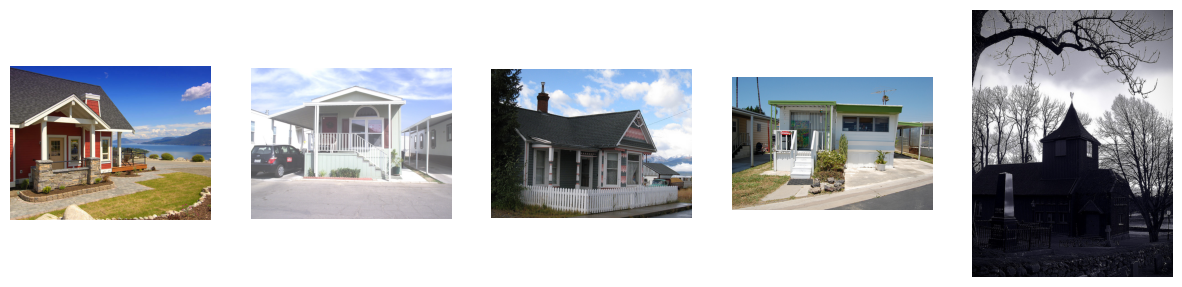

In [36]:
import matplotlib.pyplot as plt

def display_similar_images(image_paths):
    num_images = len(image_paths)
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display the similar images
display_similar_images(similar_images)